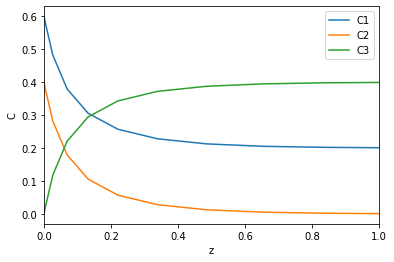

In [1]:
# import required packages
import math
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

# introduce the parameters u and kAB
# velocity u in the reactor tube in m/s
u = 4.0
# reaction kinetic coefficient in m3/(mol s)
# the units of the reaction kinetic coefficient depend on the order of the chemical reaction
kAB = 1.0e2

# define the reaction rate model as a function. It returns a list of reaction rates depending 
# on the concentrations.
def simple_reaction(C, k):
    # C is a list containing the concentrations of all species
    # Elements of a list can be accessed with square brackets []
    # remember that in Python the numbering of lists and arrays starts with 0 
    # (unlike in Matlab, for instance)
    r = k * C[0] * C[1]
    # put the reaction rates in a list and return it
    return [-r, -r, r]

# next define the plug flow reactor model
def plug_flow_reactor(z, C, u, model_param, reaction_model):
    # the model is very simple. Divide all reaction rates by the velocity
    return [r / u for r in reaction_model(C, model_param)] 

# define initial values for C and the span for calculation (0 to 1 m), where 1 m is the length
# of the reactor tube
C0 = [0.6, 0.4, 0.0]
span = [0.0, 1.0]

# solve the problem and plot the solution
# note how we can pass parameters to the function using the args keyword argument of solve_ivp
sol = solve_ivp(plug_flow_reactor, span, C0, args = (u, kAB, simple_reaction))

# for quick plotting we can use matplotlib.pyplot that provides a Matlab-like plotting
# interface
plt.plot(sol.t, sol.y[0,:])
plt.plot(sol.t, sol.y[1,:])
plt.plot(sol.t, sol.y[2,:])
plt.xlabel("z")
plt.ylabel("C")
plt.legend(["C1", "C2", "C3"])
plt.xlim((0., 1.0))
plt.show()